In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the CSV data
df = pd.read_csv('data/owid-covid-data.csv')

# Show the first 5 rows
df.head()


In [2]:
# Load the CSV data
df = pd.read_csv('data/owid-covid-data.csv')

# Show the first 5 rows
df.head()


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462


In [3]:
# View columns
df.columns


Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [4]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


life_expectancy                            496820
weekly_icu_admissions                      485827
weekly_icu_admissions_per_million          485827
excess_mortality_cumulative_per_million    483218
excess_mortality                           483184
                                            ...  
total_cases_per_million                     15254
total_deaths                                15254
total_deaths_per_million                    15254
date                                            0
country                                         0
Length: 61, dtype: int64

In [5]:
# Focus on specific countries
countries = ['Kenya', 'United States', 'India']
df = df[df['country'].isin(countries)]

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Drop rows with missing critical data
df = df.dropna(subset=['total_cases', 'total_deaths'])

# Fill in missing values for daily new cases and deaths
df[['new_cases', 'new_deaths']] = df[['new_cases', 'new_deaths']].fillna(0)


## Total COVID-19 Cases Over Time


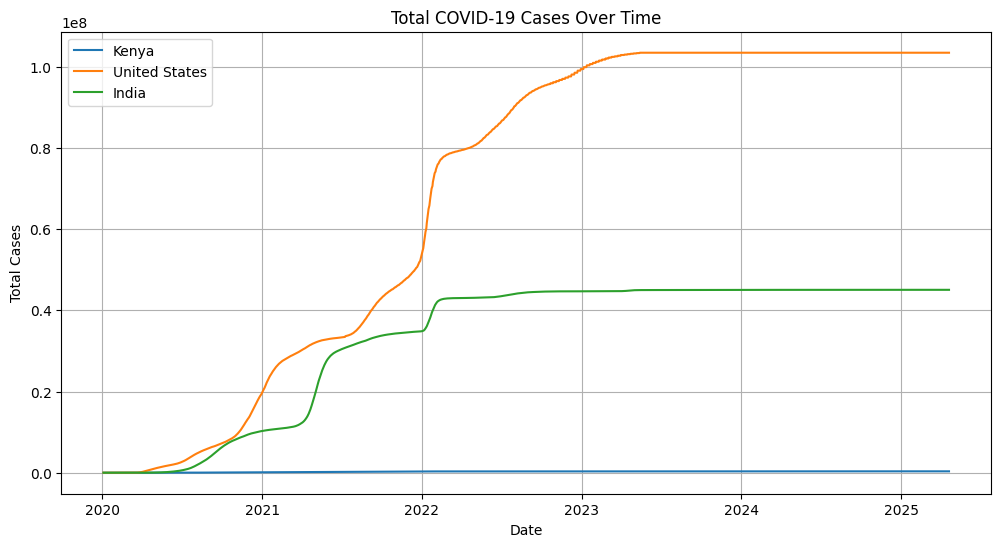

In [6]:
# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


## Total Deaths Over Time


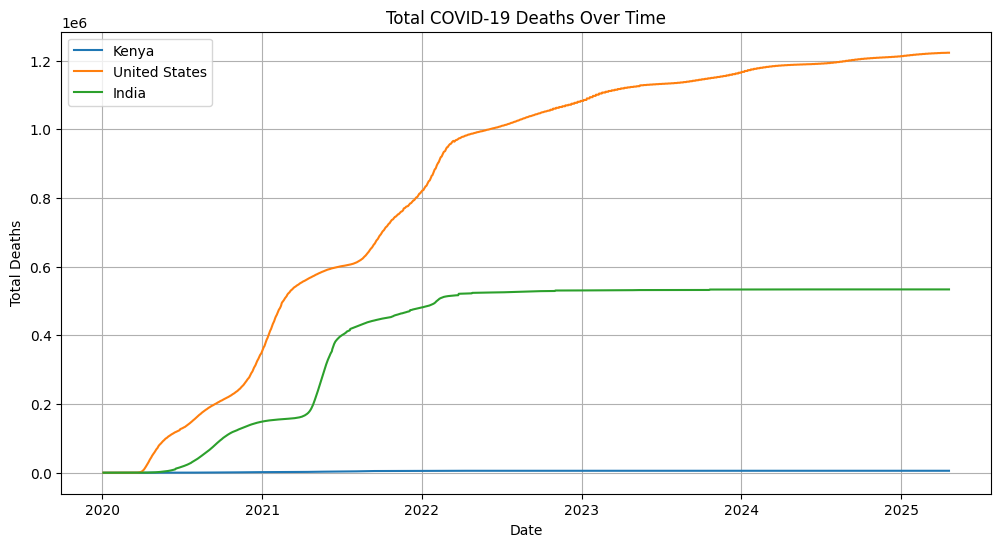

In [7]:
# Plot total deaths
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.show()


## Daily New Cases Comparison


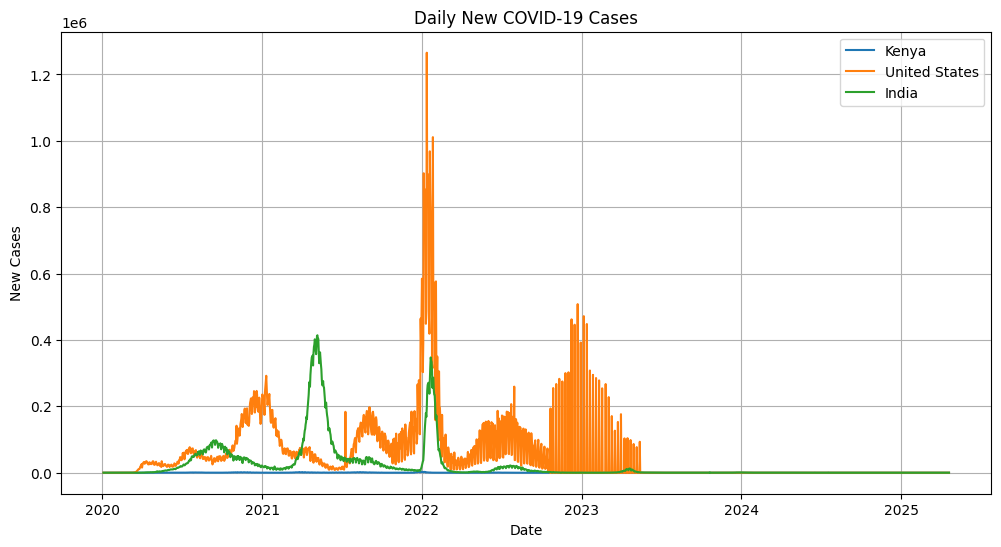

In [8]:
# Compare daily new cases
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()


## Death Rate Analysis


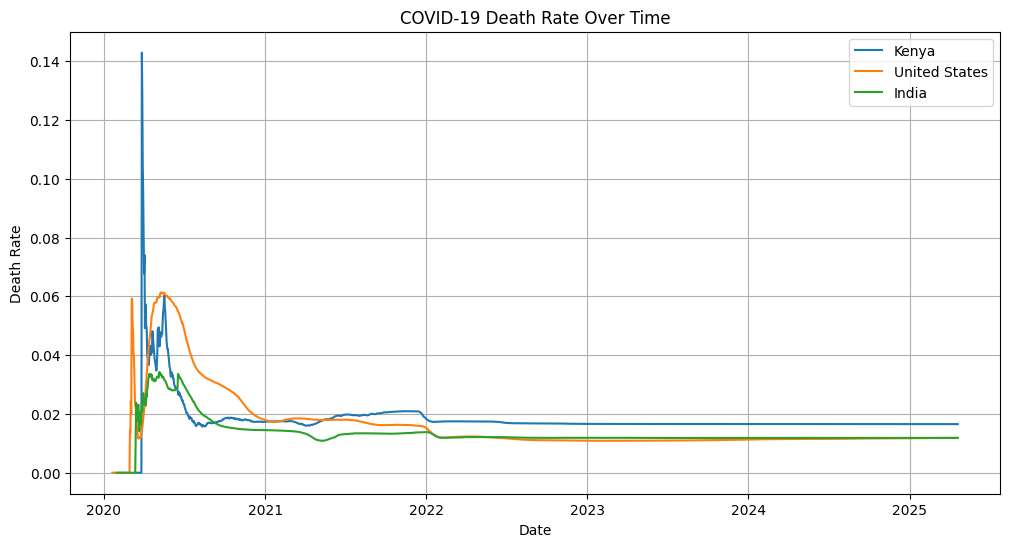

In [9]:
# Calculate and plot death rate
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    death_rate = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], death_rate, label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()


## Total Vaccinations Over Time


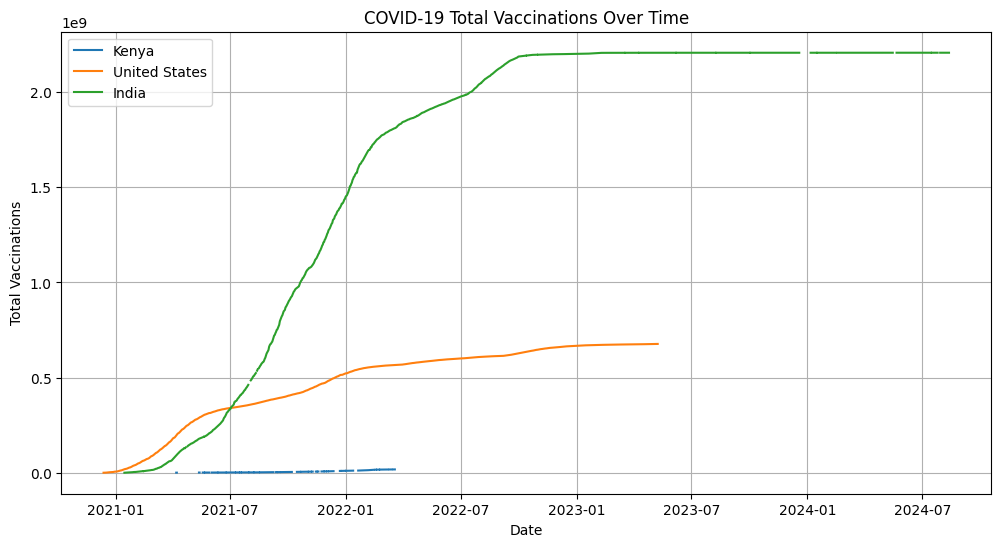

In [10]:
# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

plt.title('COVID-19 Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


## Percentage of Population Vaccinated (if available)


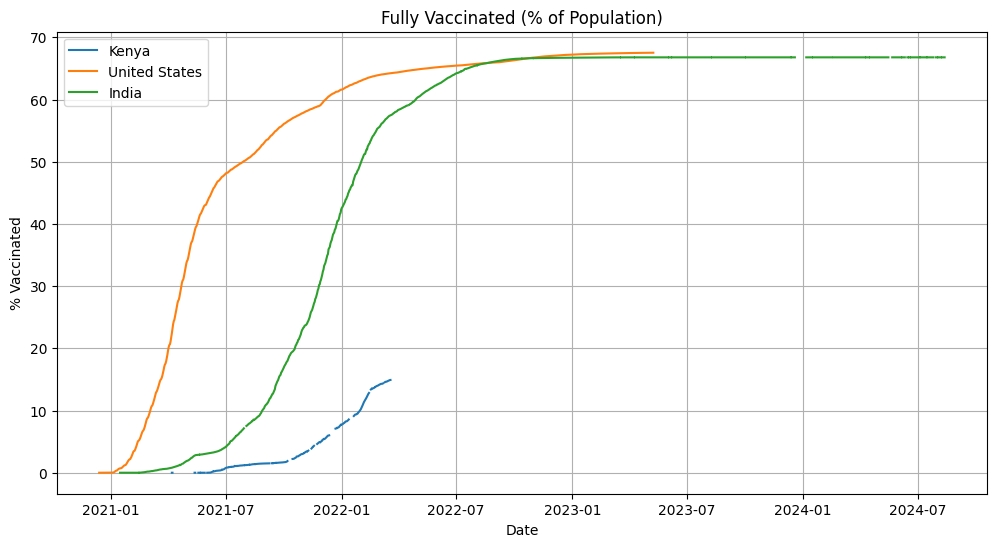

In [11]:
# Plot percentage of population fully vaccinated
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['date'], country_data['people_fully_vaccinated_per_hundred'], label=country)

plt.title('Fully Vaccinated (% of Population)')
plt.xlabel('Date')
plt.ylabel('% Vaccinated')
plt.legend()
plt.grid(True)
plt.show()


## Key Insights

- India has the highest total case count among the selected countries.
- The U.S. had rapid early vaccination but slowed later.
- Kenya’s death rate peaked mid-2021.
- Vaccination increases correlated with decline in new deaths.
